In [1]:
#importing things
import pandas as pd
import os
import numpy as np
import csv
import pylab as pl
import matplotlib.pyplot as plt
import copy
import scipy
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import sem
import scipy.stats as st
from scipy.linalg import hadamard
from scipy.stats import ttest_ind_from_stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import ttest_ind_from_stats
from sklearn.manifold import TSNE
from scipy.stats import pearsonr
from collections import OrderedDict
import seaborn as sns
from functools import reduce
from scipy.optimize import curve_fit
from operator import itemgetter
import math

# correlation between replicates

In [2]:
CR9114 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/exp_meanbin_merged.csv',delimiter=',',dtype={'variant': str}))
CR6261 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/exp_meanbin_merged.csv',delimiter=',',dtype={'variant': str}))

In [3]:
def sum_digits(digit):
    return sum(int(x) for x in digit if x.isdigit())

CR9114['som_mut'] = CR9114['variant'].apply(sum_digits)
pd.DataFrame.to_csv(CR9114, '../../../CR9114/Expression_meanbin/expression_analysis/exp_meanbin_merged.csv', sep=',', index=False)
CR6261['som_mut'] = CR6261['variant'].apply(sum_digits)
pd.DataFrame.to_csv(CR6261, '../../../CR6261/Expression_meanbin/expression_analysis/exp_meanbin_merged.csv', sep=',', index=False)

0.3292840916053118


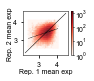

In [10]:
#CR9114
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR9114[['meanbin_a', 'meanbin_b']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['meanbin_a'], plotting['meanbin_b'],cmap='Reds',bins='log',linewidths=0.2,gridsize=25)
plt.xlabel("Rep. 1 mean exp",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 mean exp",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
x = plotting['meanbin_a']
y = plotting['meanbin_b']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([2.25,4.5])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['meanbin_a'], plotting['meanbin_b'])
m, b = np.polyfit(plotting['meanbin_a'], plotting['meanbin_b'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR9114_expcorr.png',transparent=True, dpi=600,bbox_inches='tight')

0.5181462292379986


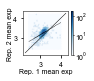

In [11]:
#CR6261
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
plotting = CR6261[['meanbin_a', 'meanbin_b']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['meanbin_a'], plotting['meanbin_b'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Rep. 1 mean exp",fontsize=7,labelpad=1)
plt.ylabel("Rep. 2 mean exp",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5)
# x_locator = FixedLocator([7,8,9,10])
# ax.xaxis.set_major_locator(x_locator)
# ax.set_xticklabels(['7','8','9','10'])
# y_locator = FixedLocator([7,8,9,10])
# ax.yaxis.set_major_locator(x_locator)
# ax.set_yticklabels(['7','8','9','10'])
# plt.xlim(7,10)
# plt.ylim(7,10)
x = plotting['meanbin_a']
y = plotting['meanbin_b']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
xs = np.array([2.25,4.25])
plt.plot(xs, xs, 'k-',linewidth=0.5)
corr, _ = pearsonr(plotting['meanbin_a'], plotting['meanbin_b'])
m, b = np.polyfit(plotting['meanbin_a'], plotting['meanbin_b'], 1)
plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR6261_expcorr.png',transparent=True, dpi=600,bbox_inches='tight')

In [6]:
CR9114

,Unnamed: 0,variant,meanbin_a,meanbin_b,meanbin_c,meanbin_d,meanbin_e,meanbin_f,meanbin_g,meanbin_h,meanbin_i,exp_mean,exp_sem,som_mut
0,0,0000000011100000,3.873020,3.461418,3.157646,3.742268,3.180677,3.094504,3.277975,2.869019,3.616911,3.363715,0.098706,3
1,1,1000110100111000,3.552436,3.477776,3.516809,3.483400,3.380463,3.538184,3.425610,3.443800,3.451707,3.474465,0.016568,7
2,2,1101101001000011,3.435238,3.437026,3.452298,3.475748,3.350134,3.384423,3.548670,3.328774,3.388221,3.422281,0.020183,8
3,3,1100111101100100,3.324845,3.292785,3.467578,3.455333,3.260765,3.357467,3.532806,3.311289,3.432839,3.381745,0.027800,9
4,4,1111101010000111,3.477025,3.574350,3.574140,3.660715,3.452052,3.584594,3.579825,3.688612,3.473241,3.562728,0.024514,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,65531,0000100111001100,3.449725,3.604299,2.750955,3.158085,3.313045,3.438812,3.422476,3.545444,3.307722,3.332285,0.076155,6
65532,65532,0000000110001101,3.347872,2.963336,3.229503,3.683468,3.710792,3.591601,3.236924,3.252776,3.399492,3.379529,0.073077,5
65533,65533,0010100011110111,3.940552,3.597109,3.548941,3.489910,2.984966,3.411515,3.868343,3.123186,3.504799,3.496591,0.091693,9
65534,65534,0010000000100100,3.332525,3.405012,3.003787,3.734446,3.069485,3.667980,2.945136,3.258073,3.124316,3.282307,0.083855,3


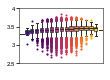

In [23]:
plt.rcParams['font.sans-serif'] = "Arial"
from matplotlib.ticker import FixedLocator, FixedFormatter
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=1)
fig, ax = plt.subplots(figsize=(1.5,1))
sns.boxplot(x="som_mut", y="exp_mean", data=CR9114,palette='plasma', saturation=1,
            flierprops=flierprops,ax=ax, width=0.7)

#plt.title("H1",fontsize=8,weight='bold')
plt.xlabel(" ",fontsize=8)
plt.ylabel("",fontsize=8,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
#x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
#ax.xaxis.set_major_locator(x_locator)
#ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])
y_locator = FixedLocator([2.5,3,3.5,4])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['2.5','3','3.5','4'])
plt.ylim(2.5,4)
# plt.axhline(y=7,linestyle='dashed',linewidth=0.5,color='black')

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    #artist.set_facecolor('white')
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        #line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('20210529_Exp_box_bymut_9114.png', transparent=True, dpi=600,bbox_inches='tight')

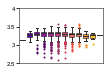

In [24]:
plt.rcParams['font.sans-serif'] = "Arial"
from matplotlib.ticker import FixedLocator, FixedFormatter
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=1)
fig, ax = plt.subplots(figsize=(1.5,1))
sns.boxplot(x="som_mut", y="exp_mean", data=CR6261,palette='plasma', saturation=1,
            flierprops=flierprops, ax=ax, width=0.7)

#plt.title("H1",fontsize=8,weight='bold')
plt.xlabel(" ",fontsize=8)
plt.ylabel("",fontsize=8,labelpad=0)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelsize=6)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    labelsize=6,
    pad=0.5)
#x_locator = FixedLocator([0,2,4,6,8,10,12,14,16])
#ax.xaxis.set_major_locator(x_locator)
#ax.set_xticklabels(['0','2','4','6','8','10','12','14','16'])
y_locator = FixedLocator([2.5,3,3.5,4])
ax.yaxis.set_major_locator(y_locator)
ax.set_yticklabels(['2.5','3','3.5','4'])
plt.ylim(2.5,4)
# plt.axhline(y=7,linestyle='dashed',linewidth=0.5,color='black')

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = lighten_color(artist.get_facecolor(), 1.2)
    artist.set_edgecolor(col) 
    #artist.set_facecolor('white')
    artist.set_edgecolor('black') 
    artist.set_linewidth(0.5)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        #line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(1)
plt.savefig('20210529_Exp_box_bymut_6261.png', transparent=True, dpi=600,bbox_inches='tight')

# correlation between expression and binding

In [4]:
##merge with Kd data for correlation plots
CR9114_Kd = pd.DataFrame(pd.read_csv('../../../CR9114/Kd_meanbin/kd_processed/20210427_HA_unadj_fil_merg.csv',delimiter=',',dtype={'variant': str}))
CR9114_merged = pd.merge(CR9114, CR9114_Kd,on='variant')
CR9114_merged

,Unnamed: 0,variant,meanbin_a,meanbin_b,meanbin_c,meanbin_d,meanbin_e,meanbin_f,meanbin_g,meanbin_h,...,pos8,pos9,pos10,pos11,pos12,pos13,pos14,pos15,pos16,som_mut_y
0,0,0000000011100000,3.873020,3.461418,3.157646,3.742268,3.180677,3.094504,3.277975,2.869019,...,0,1,1,1,0,0,0,0,0,3
1,1,1000110100111000,3.552436,3.477776,3.516809,3.483400,3.380463,3.538184,3.425610,3.443800,...,1,0,0,1,1,1,0,0,0,7
2,2,1101101001000011,3.435238,3.437026,3.452298,3.475748,3.350134,3.384423,3.548670,3.328774,...,0,0,1,0,0,0,0,1,1,8
3,3,1100111101100100,3.324845,3.292785,3.467578,3.455333,3.260765,3.357467,3.532806,3.311289,...,1,0,1,1,0,0,1,0,0,9
4,4,1111101010000111,3.477025,3.574350,3.574140,3.660715,3.452052,3.584594,3.579825,3.688612,...,0,1,0,0,0,0,1,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,65531,0000100111001100,3.449725,3.604299,2.750955,3.158085,3.313045,3.438812,3.422476,3.545444,...,1,1,1,0,0,1,1,0,0,6
65532,65532,0000000110001101,3.347872,2.963336,3.229503,3.683468,3.710792,3.591601,3.236924,3.252776,...,1,1,0,0,0,1,1,0,1,5
65533,65533,0010100011110111,3.940552,3.597109,3.548941,3.489910,2.984966,3.411515,3.868343,3.123186,...,0,1,1,1,1,0,1,1,1,9
65534,65534,0010000000100100,3.332525,3.405012,3.003787,3.734446,3.069485,3.667980,2.945136,3.258073,...,0,0,0,1,0,0,1,0,0,3


In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import colorsys
import seaborn as sns

def lighten_color(color, amount=0.5):  
    # --------------------- SOURCE: @IanHincks ---------------------
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [35]:
germ_h1 = float(CR9114_merged['h1_mean'].values[CR9114_merged['variant']=='0000000000000000'])
germ_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='0000000000000000'])
som_h1 = float(CR9114_merged['h1_mean'].values[CR9114_merged['variant']=='1111111111111111'])
som_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='1111111111111111'])
germline = ([germ_h1,germ_exp])
somatic = ([som_h1,som_exp])
print(germline)
print(somatic)

[8.424622015254007, 3.3055785334983643]
[9.592294332007963, 3.392289912311962]


In [34]:
germ_h3 = float(CR9114_merged['h3_mean'].values[CR9114_merged['variant']=='0000000000000000'])
germ_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='0000000000000000'])
som_h3 = float(CR9114_merged['h3_mean'].values[CR9114_merged['variant']=='1111111111111111'])
som_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='1111111111111111'])
germline = ([germ_h3,germ_exp])
somatic = ([som_h3,som_exp])
print(germline)
print(somatic)

[6.0, 3.3055785334983643]
[8.50240109711821, 3.392289912311962]


In [41]:
germ_fluB = float(CR9114_merged['fluB_mean'].values[CR9114_merged['variant']=='0000000000000000'])
germ_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='0000000000000000'])
som_fluB = float(CR9114_merged['fluB_mean'].values[CR9114_merged['variant']=='1111111111111111'])
som_exp = float(CR9114_merged['exp_mean'].values[CR9114_merged['variant']=='1111111111111111'])
germline = ([germ_fluB,germ_exp])
somatic = ([som_fluB,som_exp])
print(germline)
print(somatic)

[6.0, 3.3055785334983643]
[7.171486631538251, 3.392289912311962]


-0.15424339975960888


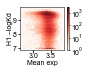

In [13]:
#CR9114
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR9114_merged[['exp_mean', 'h1_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_mean'], plotting['h1_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("H1 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_mean']
y = plotting['h1_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_mean'], plotting['h1_mean'])
#m, b = np.polyfit(plotting['exp_mean'], plotting['h1_mean'], 1)
#plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR9114_expcorrh1.png',transparent=True, dpi=600,bbox_inches='tight')

-0.06049176107012684


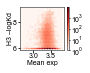

In [14]:
#CR9114
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR9114_merged[['exp_mean', 'h3_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_mean'], plotting['h3_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("H3 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_mean']
y = plotting['h3_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_mean'], plotting['h3_mean'])
#m, b = np.polyfit(plotting['exp_mean'], plotting['h3_mean'], 1)
#plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR9114_expcorrh3.png',transparent=True, dpi=600,bbox_inches='tight')

0.0053702541106048765


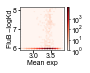

In [15]:
#CR9114
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR9114_merged[['exp_mean', 'fluB_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_mean'], plotting['fluB_mean'],cmap='Reds',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("FluB –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_mean']
y = plotting['fluB_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_mean'], plotting['fluB_mean'])
#m, b = np.polyfit(plotting['exp_mean'], plotting['fluB_mean'], 1)
#plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR9114_expcorrfluB.png',transparent=True, dpi=600,bbox_inches='tight')

In [43]:
##merge with Kd data for correlation plots
CR6261_Kd = pd.DataFrame(pd.read_csv('../../../CR6261/Kd_meanbin/kd_processed/20210323_6261_HA_unadj_fil_merg.csv',delimiter=',',dtype={'variant': str}))
CR6261_merged = pd.merge(CR6261, CR6261_Kd,on='variant')
CR6261_merged

,Unnamed: 0,variant,meanbin_a,meanbin_b,meanbin_c,meanbin_x,meanbin_y,meanbin_z,exp_mean,exp_sem,...,pos3,pos4,pos5,pos6,pos7,pos8,pos9,pos10,pos11,som_mut_y
0,0,10000100110,3.288611,3.461114,3.501627,3.583245,3.510982,3.353540,3.449853,0.037674,...,0,0,0,1,0,0,1,1,0,4
1,1,10000100100,3.219390,3.429603,3.387825,3.509414,3.579111,3.340647,3.410998,0.043778,...,0,0,0,1,0,0,1,0,0,3
2,2,10101100111,3.345278,3.467731,3.553483,3.573136,3.437340,3.328430,3.450900,0.035216,...,1,0,1,1,0,0,1,1,1,7
3,3,10010100111,3.168061,3.272303,3.357477,3.313150,3.407831,3.233264,3.292014,0.029821,...,0,1,0,1,0,0,1,1,1,6
4,4,00000100100,3.202519,3.165271,3.346665,3.268474,3.462163,3.465887,3.318497,0.044344,...,0,0,0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,2034,11110110110,3.544009,3.573923,3.745043,3.696369,3.249022,3.641644,3.575002,0.060810,...,1,1,0,1,1,0,1,1,0,8
1913,2036,10010010010,2.764138,2.904766,3.228795,3.129007,3.130171,3.722788,3.146611,0.113818,...,0,1,0,0,1,0,0,1,0,4
1914,2040,01011110111,2.465811,2.502211,3.302486,3.241454,2.866602,3.373152,2.958619,0.140553,...,0,1,1,1,1,0,1,1,1,8
1915,2043,11000010001,2.694571,3.077350,2.608053,3.270034,3.265261,3.140836,3.009351,0.099461,...,0,0,0,0,1,0,0,0,1,4


In [45]:
germ_h1 = float(CR6261_merged['h1_mean'].values[CR6261_merged['variant']=='00000000000'])
germ_exp = float(CR6261_merged['exp_mean'].values[CR6261_merged['variant']=='00000000000'])
som_h1 = float(CR6261_merged['h1_mean'].values[CR6261_merged['variant']=='11111111111'])
som_exp = float(CR6261_merged['exp_mean'].values[CR6261_merged['variant']=='11111111111'])
germline = ([germ_h1,germ_exp])
somatic = ([som_h1,som_exp])
print(germline)
print(somatic)

[7.0, 3.141163521112256]
[9.506654275000498, 3.267142160957555]


In [48]:
germ_h9 = float(CR6261_merged['h9_mean'].values[CR6261_merged['variant']=='00000000000'])
germ_exp = float(CR6261_merged['exp_mean'].values[CR6261_merged['variant']=='00000000000'])
som_h9 = float(CR6261_merged['h9_mean'].values[CR6261_merged['variant']=='11111111111'])
som_exp = float(CR6261_merged['exp_mean'].values[CR6261_merged['variant']=='11111111111'])
germline = ([germ_h9,germ_exp])
somatic = ([som_h9,som_exp])
print(germline)
print(somatic)

[7.0, 3.141163521112256]
[10.094744421532916, 3.267142160957555]


-0.28274723304208765


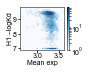

In [17]:
#CR6261
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR6261_merged[['exp_mean', 'h1_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_mean'], plotting['h1_mean'],cmap='Blues',linewidths=0.2,bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("H1 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_mean']
y = plotting['h1_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_mean'], plotting['h1_mean'])
#m, b = np.polyfit(plotting['exp_mean'], plotting['h1_mean'], 1)
#plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR6261_expcorrh1.png',transparent=True, dpi=600,bbox_inches='tight')

-0.068581203460893


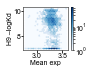

In [18]:
#CR6261
from matplotlib.ticker import FixedLocator, FixedFormatter
from numpy import polyfit
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
flierprops = dict(marker='o', markersize=2)
fig, ax = plt.subplots(figsize=(1,0.8))
from scipy.stats import pearsonr
plotting = CR6261_merged[['exp_mean', 'h9_mean']].copy()
plotting.dropna(inplace=True)
hb=plt.hexbin(plotting['exp_mean'], plotting['h9_mean'],linewidths=0.2,cmap='Blues',bins='log',gridsize=25)
plt.xlabel("Mean exp",fontsize=7,labelpad=1)
plt.ylabel("H9 –logKd",fontsize=7,labelpad=0)
plt.tick_params(labelsize=7,length=2.5,pad=0)
x = plotting['exp_mean']
y = plotting['h9_mean']
cb = fig.colorbar(hb, ax=ax,ticks=[1,10,100,1000],orientation='vertical',pad=0.05)
cb.ax.tick_params(labelsize=7,pad=1,size=1)
corr, _ = pearsonr(plotting['exp_mean'], plotting['h9_mean'])
#m, b = np.polyfit(plotting['exp_mean'], plotting['h9_mean'], 1)
#plt.plot(x, m*x + b,'k:',zorder=10000,c='black',linewidth=0.5)
print(corr)
plt.savefig('CR6261_expcorrh9.png',transparent=True, dpi=600,bbox_inches='tight')

# change in expression by mutation position

In [19]:
CR6261_pos1 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos1_11muts_0323.csv',delimiter=','))
CR6261_pos2 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos2_11muts_0323.csv',delimiter=','))
CR6261_pos3 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos3_11muts_0323.csv',delimiter=','))
CR6261_pos4 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos4_11muts_0323.csv',delimiter=','))
CR6261_pos5 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos5_11muts_0323.csv',delimiter=','))
CR6261_pos6 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos6_11muts_0323.csv',delimiter=','))
CR6261_pos7 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos7_11muts_0323.csv',delimiter=','))
CR6261_pos8 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos8_11muts_0323.csv',delimiter=','))
CR6261_pos9 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos9_11muts_0323.csv',delimiter=','))
CR6261_pos10 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos10_11muts_0323.csv',delimiter=','))
CR6261_pos11 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos11_11muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR6261_pos1['deltaKd'].copy()
summary['pos2']=CR6261_pos2['deltaKd'].copy()
summary['pos3']=CR6261_pos3['deltaKd'].copy()
summary['pos4']=CR6261_pos4['deltaKd'].copy()
summary['pos5']=CR6261_pos5['deltaKd'].copy()
summary['pos6']=CR6261_pos6['deltaKd'].copy()
summary['pos7']=CR6261_pos7['deltaKd'].copy()
summary['pos8']=CR6261_pos8['deltaKd'].copy()
summary['pos9']=CR6261_pos9['deltaKd'].copy()
summary['pos10']=CR6261_pos10['deltaKd'].copy()
summary['pos11']=CR6261_pos11['deltaKd'].copy()
summary

,pos1,pos2,pos3,pos4,pos5,pos6,pos7,pos8,pos9,pos10,pos11
0,0.092502,-0.121765,-0.075786,-0.019539,0.013312,-0.074066,-0.382603,-0.002101,-0.011860,0.038855,-0.083442
1,-0.005883,-0.073125,-0.043209,0.025543,0.057076,-0.058442,0.090876,-0.027552,-0.027583,0.137239,-0.037322
2,-0.071471,-0.043680,0.095991,-0.013012,0.040421,-0.059687,-0.119630,-0.001868,0.084001,0.170157,0.077069
3,-0.169818,0.020024,0.084493,0.101036,0.110105,-0.096726,0.058016,0.115267,-0.096998,-0.139420,-0.027891
4,0.012243,-0.094165,0.027605,-0.090859,0.056883,0.196188,-0.121813,0.088240,0.137307,-0.047416,-0.037829
...,...,...,...,...,...,...,...,...,...,...,...
1019,0.300661,-0.089444,0.015463,0.550832,-0.153484,0.097920,-0.115825,0.246704,0.172216,0.215073,-0.028364
1020,0.158306,-0.285526,0.041668,0.138332,-0.157523,0.188667,-0.020752,0.029743,0.296337,0.019439,-0.177823
1021,-0.140713,-0.143763,0.091924,0.089796,-0.187636,0.445320,-0.047499,0.155316,0.490001,0.050971,-0.120313
1022,-0.241975,-0.089040,0.187962,-0.440976,0.166758,0.082527,-0.106619,-0.006789,0.215436,-0.181581,-0.108859


In [20]:
values = summary.mean()
print(values)

pos1     0.008910
pos2    -0.060268
pos3    -0.002528
pos4    -0.006844
pos5     0.019384
pos6     0.034239
pos7    -0.099540
pos8     0.027274
pos9     0.047128
pos10    0.001592
pos11    0.006165
dtype: float64


In [21]:
import matplotlib
import matplotlib.colors as mcolors
# Try to map values to colors in hex
# # Taken from here 
norm = matplotlib.colors.Normalize(vmin=-0.1, vmax=0.1, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.bwr)

colors = np.array(values.apply(lambda x: mcolors.to_hex(mapper.to_rgba(x))))
colors

array(['#ffe8e8', '#6464ff', '#f8f8ff', '#eeeeff', '#ffcece', '#ffa8a8',
       '#0000ff', '#ffbaba', '#ff8686', '#fffafa', '#fff0f0'],
      dtype=object)

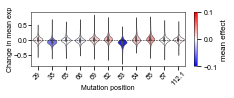

In [22]:
toplot = summary.melt(var_name='groups', value_name='vals')
fig, ax = plt.subplots(figsize=(3,1))
ax = sns.violinplot(x="groups", y="vals", data=toplot,palette=colors,linewidth=0.5)
plt.xlabel('Mutation position',fontsize=7,labelpad=-2)
plt.ylabel('Change in mean exp',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
ax.set_xticklabels(['29','35','65','66','69','82','83','84','85','87','112.1'],rotation=45)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin = -0.1, vmax=0.1))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.025, pad=0.05,orientation='vertical',aspect=20,ticks=[-0.1,0,0.1])
cbar.set_label(label='mean effect',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig('CR6261_expbypos.png',transparent=True, dpi=600,bbox_inches='tight')

In [3]:
#do a two-sided t-test to see if mean is different from zero
for pos in range(1,12):   
    vals_1 = np.array(summary['pos%s' % pos])
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/11:
        lab = '***'
    elif pval < 0.001/11:
        lab = '**'
    elif pval < 0.01/11:
        lab = '*'
    else:
        lab = 'ns'
    print(pos,tstat,pval,n1,n2,lab)

1 2.7122360542287414 0.006795195322259924 1024 1 ns
2 -17.464132797249377 5.638830846691602e-60 1024 1 ***
3 -0.7428673234941322 0.4577325595387506 1024 1 ns
4 -1.994204074297796 0.04639482775512592 1024 1 ns
5 5.515730466516389 4.3990204860830516e-08 1024 1 ***
6 8.52395188408654 5.469973623498361e-17 1024 1 ***
7 -25.149347977055577 4.73849117118072e-109 1024 1 ***
8 6.89350845373657 9.508793742820251e-12 1024 1 ***
9 11.506302950871309 6.743009530698291e-29 1024 1 ***
10 0.46631125483391805 0.6410920007761722 1024 1 ns
11 2.1008150656446443 0.035901442785672484 1024 1 ns


In [23]:
CR9114_pos1 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos1_16muts_0323.csv',delimiter=','))
CR9114_pos2 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos2_16muts_0323.csv',delimiter=','))
CR9114_pos3 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos3_16muts_0323.csv',delimiter=','))
CR9114_pos4 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos4_16muts_0323.csv',delimiter=','))
CR9114_pos5 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos5_16muts_0323.csv',delimiter=','))
CR9114_pos6 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos6_16muts_0323.csv',delimiter=','))
CR9114_pos7 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos7_16muts_0323.csv',delimiter=','))
CR9114_pos8 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos8_16muts_0323.csv',delimiter=','))
CR9114_pos9 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos9_16muts_0323.csv',delimiter=','))
CR9114_pos10 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos10_16muts_0323.csv',delimiter=','))
CR9114_pos11 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos11_16muts_0323.csv',delimiter=','))
CR9114_pos12 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos12_16muts_0323.csv',delimiter=','))
CR9114_pos13 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos13_16muts_0323.csv',delimiter=','))
CR9114_pos14 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos14_16muts_0323.csv',delimiter=','))
CR9114_pos15 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos15_16muts_0323.csv',delimiter=','))
CR9114_pos16 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos16_16muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR9114_pos1['deltaKd'].copy()
summary['pos2']=CR9114_pos2['deltaKd'].copy()
summary['pos3']=CR9114_pos3['deltaKd'].copy()
summary['pos4']=CR9114_pos4['deltaKd'].copy()
summary['pos5']=CR9114_pos5['deltaKd'].copy()
summary['pos6']=CR9114_pos6['deltaKd'].copy()
summary['pos7']=CR9114_pos7['deltaKd'].copy()
summary['pos8']=CR9114_pos8['deltaKd'].copy()
summary['pos9']=CR9114_pos9['deltaKd'].copy()
summary['pos10']=CR9114_pos10['deltaKd'].copy()
summary['pos11']=CR9114_pos11['deltaKd'].copy()
summary['pos12']=CR9114_pos12['deltaKd'].copy()
summary['pos13']=CR9114_pos13['deltaKd'].copy()
summary['pos14']=CR9114_pos14['deltaKd'].copy()
summary['pos15']=CR9114_pos15['deltaKd'].copy()
summary['pos16']=CR9114_pos16['deltaKd'].copy()
expression = list(summary.mean())
error = list(summary.sem())
values = summary.mean()
print(expression)
print(error)

[-0.012141334499325255, 0.0010857255192520756, 0.01750603959578315, 0.03279269547725583, -0.003191634256636335, -0.0029561951053962065, -0.005501775766558489, 0.000707346460383218, -0.023996649832799623, -0.06004534254508296, 0.0022988511297972443, 0.03957991614933853, 0.01928621766219513, 0.03937380274388397, 0.007119462227470863, 0.05254553603656093]
[0.0006033308146079151, 0.0006014753429411708, 0.0006022136660713425, 0.0006331052275728506, 0.000637355522286022, 0.0006415090272343948, 0.0006414440323814019, 0.0006399791552851447, 0.0006511539229715438, 0.0006684697336021202, 0.0006466405199204055, 0.00065189275243356, 0.0006385940329210767, 0.0006380633866603733, 0.0006158954675334426, 0.0005737241493564417]


In [5]:
#do a two-sided t-test to see if mean is different from zero
for pos in range(1,17):   
    vals_1 = np.array(summary['pos%s' % pos])
    vals_2 = 0
    n1 = len(np.where(~np.isnan(vals_1))[0])
    n2 = len(np.where(~np.isnan(vals_2))[0])
    tstat,pval = st.ttest_1samp(vals_1,vals_2,nan_policy='omit')
    if pval < 0.0001/16:
        lab = '***'
    elif pval < 0.001/16:
        lab = '**'
    elif pval < 0.01/16:
        lab = '*'
    else:
        lab = 'ns'
    print(pos,tstat,pval,n1,n2,lab)

1 -20.123842849325634 1.5881573033841018e-89 32768 1 ***
2 1.8051039531278144 0.07106759232916776 32768 1 ns
3 29.06948244796107 1.8739144085163927e-183 32768 1 ***
4 51.79659565120606 0.0 32768 1 ***
5 -5.007619993922409 5.539294626964857e-07 32768 1 ***
6 -4.608189409493883 4.077196786356875e-06 32768 1 ***
7 -8.577171957049481 1.014401102975998e-17 32768 1 ***
8 1.1052648426776668 0.269052962471722 32768 1 ns
9 -36.85249982567971 2.413527614122658e-291 32768 1 ***
10 -89.82507288927187 0.0 32768 1 ***
11 3.5550681699937527 0.0003784130122419831 32768 1 *
12 60.715379947980544 0.0 32768 1 ***
13 30.201061500646162 1.183084758807063e-197 32768 1 ***
14 61.70829351291661 0.0 32768 1 ***
15 11.559530152061502 7.583726329038987e-31 32768 1 ***
16 91.58676011024154 0.0 32768 1 ***


In [24]:
import matplotlib
import matplotlib.colors as mcolors
# Try to map values to colors in hex
# # Taken from here 
norm = matplotlib.colors.Normalize(vmin=-0.1, vmax=0.1, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.bwr)

colors = np.array(values.apply(lambda x: mcolors.to_hex(mapper.to_rgba(x))))
colors

array(['#e0e0ff', '#fffcfc', '#ffd2d2', '#ffacac', '#f6f6ff', '#f8f8ff',
       '#f0f0ff', '#fffefe', '#c2c2ff', '#6666ff', '#fffafa', '#ff9a9a',
       '#ffcece', '#ff9a9a', '#ffecec', '#ff7878'], dtype=object)

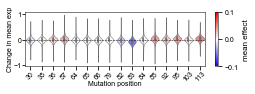

In [25]:
toplot = pd.DataFrame()
toplot = summary.melt(var_name='groups', value_name='vals')
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="groups", y="vals", data=toplot,palette=colors,linewidth=0.5)
plt.xlabel('Mutation position',fontsize=7,labelpad=-2)
plt.ylabel('Change in mean exp',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
ax.set_xticklabels(['30','35','36','57','64','65','66','79','82','83','84','85','92','95','103','113'],rotation=45)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0,
    labelsize=7)
sm = plt.cm.ScalarMappable(cmap=plt.cm.bwr, norm=plt.Normalize(vmin = -0.1, vmax=0.1))
sm._A = []
cbar = plt.colorbar(sm,fraction=0.025, pad=0.05,orientation='vertical',aspect=20,ticks=[-0.1,0,0.1])
cbar.set_label(label='mean effect',size=8)
cbar.ax.tick_params(labelsize=7)
plt.savefig('CR9114_expbypos.png',transparent=True, dpi=600,bbox_inches='tight')

# change in expression by number of mutations

In [26]:
frames = [CR9114_pos1,CR9114_pos2,CR9114_pos3,CR9114_pos4,CR9114_pos5,CR9114_pos6,CR9114_pos7,CR9114_pos8,CR9114_pos9,CR9114_pos10,CR9114_pos11,CR9114_pos12,CR9114_pos13,CR9114_pos14,CR9114_pos15,CR9114_pos16]
CR9114_allexp = pd.concat(frames)
CR9114_allexp

,count,deltaKd
0,3,-0.005478
1,6,-0.081044
2,6,0.025611
3,7,0.037340
4,9,0.043308
...,...,...
32763,6,0.385651
32764,6,-0.128880
32765,6,-0.055408
32766,6,0.052358


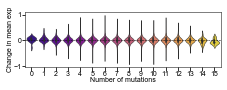

In [27]:
fig, ax = plt.subplots(figsize=(3.5,1))
ax = sns.violinplot(x="count", y="deltaKd", data=CR9114_allexp,palette='plasma',linewidth=0.5)
plt.xlabel('Number of mutations',fontsize=7,labelpad=0)
plt.ylabel('Change in mean exp',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
#ax.set_xticklabels(['30','35','36','57','64','65','66','79','82','83','84','85','92','95','103','113'],rotation=45)
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0.5,
    labelsize=7)
plt.savefig('CR9114_expbynum.png',transparent=True, dpi=600,bbox_inches='tight')

In [28]:
frames2 = [CR6261_pos1,CR6261_pos2,CR6261_pos3,CR6261_pos4,CR6261_pos5,CR6261_pos6,CR6261_pos7,CR6261_pos8,CR6261_pos9,CR6261_pos10,CR6261_pos11]
CR6261_allexp = pd.concat(frames2)
CR6261_allexp

,count,deltaKd
0,2,0.092502
1,3,-0.005883
2,5,-0.071471
3,5,-0.169818
4,6,0.012243
...,...,...
1019,4,-0.028364
1020,6,-0.177823
1021,6,-0.120313
1022,9,-0.108859


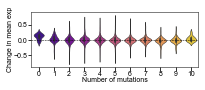

In [29]:
fig, ax = plt.subplots(figsize=(3,1))
ax = sns.violinplot(x="count", y="deltaKd", data=CR6261_allexp,palette='plasma',linewidth=0.5)
plt.xlabel('Number of mutations',fontsize=7,labelpad=0)
plt.ylabel('Change in mean exp',fontsize=7,labelpad=0)
plt.axhline(y=0,linestyle='dashed',linewidth=0.5,color='black')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',
    pad=0.5,
    labelsize=7)
plt.savefig('CR6261_expbynum.png',transparent=True, dpi=600,bbox_inches='tight')

## CR9114: correlation between mean change in expression and mean change in binding for each site

In [30]:
#h1
CR9114_pos1 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos1_16muts_0323.csv',delimiter=','))
CR9114_pos2 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos2_16muts_0323.csv',delimiter=','))
CR9114_pos3 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos3_16muts_0323.csv',delimiter=','))
CR9114_pos4 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos4_16muts_0323.csv',delimiter=','))
CR9114_pos5 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos5_16muts_0323.csv',delimiter=','))
CR9114_pos6 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos6_16muts_0323.csv',delimiter=','))
CR9114_pos7 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos7_16muts_0323.csv',delimiter=','))
CR9114_pos8 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos8_16muts_0323.csv',delimiter=','))
CR9114_pos9 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos9_16muts_0323.csv',delimiter=','))
CR9114_pos10 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos10_16muts_0323.csv',delimiter=','))
CR9114_pos11 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos11_16muts_0323.csv',delimiter=','))
CR9114_pos12 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos12_16muts_0323.csv',delimiter=','))
CR9114_pos13 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos13_16muts_0323.csv',delimiter=','))
CR9114_pos14 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos14_16muts_0323.csv',delimiter=','))
CR9114_pos15 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos15_16muts_0323.csv',delimiter=','))
CR9114_pos16 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos16_16muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR9114_pos1['deltaKd'].copy()
summary['pos2']=CR9114_pos2['deltaKd'].copy()
summary['pos3']=CR9114_pos3['deltaKd'].copy()
summary['pos4']=CR9114_pos4['deltaKd'].copy()
summary['pos5']=CR9114_pos5['deltaKd'].copy()
summary['pos6']=CR9114_pos6['deltaKd'].copy()
summary['pos7']=CR9114_pos7['deltaKd'].copy()
summary['pos8']=CR9114_pos8['deltaKd'].copy()
summary['pos9']=CR9114_pos9['deltaKd'].copy()
summary['pos10']=CR9114_pos10['deltaKd'].copy()
summary['pos11']=CR9114_pos11['deltaKd'].copy()
summary['pos12']=CR9114_pos12['deltaKd'].copy()
summary['pos13']=CR9114_pos13['deltaKd'].copy()
summary['pos14']=CR9114_pos14['deltaKd'].copy()
summary['pos15']=CR9114_pos15['deltaKd'].copy()
summary['pos16']=CR9114_pos16['deltaKd'].copy()
h1 = list(summary.mean())
h1_err = list(summary.sem())
print(h1)
print(h1_err)

[-0.16460850606272323, 0.01627049686097261, 0.04667898047615976, 0.4085763427055509, 0.06083728103001002, -0.03753913760915226, -0.14092103995372532, 0.006699042508093742, 0.4494916060047094, 0.8063149342888823, 0.010365170000660711, 0.005302444349143128, 0.00504889269494204, 0.008714745049792617, -0.010048929902263679, -0.002354143700892786]
[0.002063752574606051, 0.0009488192208378065, 0.00098699238980211, 0.0031215198246949947, 0.00136650928973876, 0.0022581435088275853, 0.0013842710216510914, 0.0008458507598578961, 0.0026713333412289354, 0.003372370822835182, 0.0008984085885573692, 0.0009383876654399683, 0.0008214769876154778, 0.0008301098846791923, 0.0008274353463449409, 0.0009316485672261424]


In [31]:
#h3
CR9114_pos1 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos1_16muts_0323.csv',delimiter=','))
CR9114_pos2 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos2_16muts_0323.csv',delimiter=','))
CR9114_pos3 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos3_16muts_0323.csv',delimiter=','))
CR9114_pos4 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos4_16muts_0323.csv',delimiter=','))
CR9114_pos5 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos5_16muts_0323.csv',delimiter=','))
CR9114_pos6 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos6_16muts_0323.csv',delimiter=','))
CR9114_pos7 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos7_16muts_0323.csv',delimiter=','))
CR9114_pos8 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos8_16muts_0323.csv',delimiter=','))
CR9114_pos9 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos9_16muts_0323.csv',delimiter=','))
CR9114_pos10 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos10_16muts_0323.csv',delimiter=','))
CR9114_pos11 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos11_16muts_0323.csv',delimiter=','))
CR9114_pos12 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos12_16muts_0323.csv',delimiter=','))
CR9114_pos13 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos13_16muts_0323.csv',delimiter=','))
CR9114_pos14 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos14_16muts_0323.csv',delimiter=','))
CR9114_pos15 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos15_16muts_0323.csv',delimiter=','))
CR9114_pos16 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/h3_pos16_16muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR9114_pos1['deltaKd'].copy()
summary['pos2']=CR9114_pos2['deltaKd'].copy()
summary['pos3']=CR9114_pos3['deltaKd'].copy()
summary['pos4']=CR9114_pos4['deltaKd'].copy()
summary['pos5']=CR9114_pos5['deltaKd'].copy()
summary['pos6']=CR9114_pos6['deltaKd'].copy()
summary['pos7']=CR9114_pos7['deltaKd'].copy()
summary['pos8']=CR9114_pos8['deltaKd'].copy()
summary['pos9']=CR9114_pos9['deltaKd'].copy()
summary['pos10']=CR9114_pos10['deltaKd'].copy()
summary['pos11']=CR9114_pos11['deltaKd'].copy()
summary['pos12']=CR9114_pos12['deltaKd'].copy()
summary['pos13']=CR9114_pos13['deltaKd'].copy()
summary['pos14']=CR9114_pos14['deltaKd'].copy()
summary['pos15']=CR9114_pos15['deltaKd'].copy()
summary['pos16']=CR9114_pos16['deltaKd'].copy()
h3 = list(summary.mean())
h3_err = list(summary.sem())
print(h3)
print(h3_err)

[0.029447296500142987, 0.07500891579523189, 0.06306808863965116, 0.21201924774208594, 0.0934926675496165, 0.056753305671609404, -0.056591063661023004, 0.004415280245913213, 0.20245104041082615, 0.20469559643109006, 0.01725311827240587, 0.019719200552029525, 0.005516578262824887, 0.012674678861643375, -0.0060008762656246295, 0.025810758379436215]
[0.0008179379538973674, 0.0011890779725032459, 0.0010625909168700597, 0.002692539752994565, 0.0015332509156194868, 0.0012235184423685396, 0.0010309239112411812, 0.00033704676676518257, 0.002584759956356462, 0.002603362313892917, 0.00046367169998465474, 0.0005808694392703513, 0.00032446844539810274, 0.00037703532914258066, 0.0003224744431563577, 0.000540823026883642]


In [32]:
#fluB
CR9114_pos1 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos1_16muts_0323.csv',delimiter=','))
CR9114_pos2 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos2_16muts_0323.csv',delimiter=','))
CR9114_pos3 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos3_16muts_0323.csv',delimiter=','))
CR9114_pos4 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos4_16muts_0323.csv',delimiter=','))
CR9114_pos5 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos5_16muts_0323.csv',delimiter=','))
CR9114_pos6 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos6_16muts_0323.csv',delimiter=','))
CR9114_pos7 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos7_16muts_0323.csv',delimiter=','))
CR9114_pos8 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos8_16muts_0323.csv',delimiter=','))
CR9114_pos9 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos9_16muts_0323.csv',delimiter=','))
CR9114_pos10 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos10_16muts_0323.csv',delimiter=','))
CR9114_pos11 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos11_16muts_0323.csv',delimiter=','))
CR9114_pos12 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos12_16muts_0323.csv',delimiter=','))
CR9114_pos13 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos13_16muts_0323.csv',delimiter=','))
CR9114_pos14 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos14_16muts_0323.csv',delimiter=','))
CR9114_pos15 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos15_16muts_0323.csv',delimiter=','))
CR9114_pos16 = pd.DataFrame(pd.read_csv('../../../CR9114/Expression_meanbin/expression_analysis/change_bypos_slurm/fluB_pos16_16muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR9114_pos1['deltaKd'].copy()
summary['pos2']=CR9114_pos2['deltaKd'].copy()
summary['pos3']=CR9114_pos3['deltaKd'].copy()
summary['pos4']=CR9114_pos4['deltaKd'].copy()
summary['pos5']=CR9114_pos5['deltaKd'].copy()
summary['pos6']=CR9114_pos6['deltaKd'].copy()
summary['pos7']=CR9114_pos7['deltaKd'].copy()
summary['pos8']=CR9114_pos8['deltaKd'].copy()
summary['pos9']=CR9114_pos9['deltaKd'].copy()
summary['pos10']=CR9114_pos10['deltaKd'].copy()
summary['pos11']=CR9114_pos11['deltaKd'].copy()
summary['pos12']=CR9114_pos12['deltaKd'].copy()
summary['pos13']=CR9114_pos13['deltaKd'].copy()
summary['pos14']=CR9114_pos14['deltaKd'].copy()
summary['pos15']=CR9114_pos15['deltaKd'].copy()
summary['pos16']=CR9114_pos16['deltaKd'].copy()
fluB = list(summary.mean())
fluB_err = list(summary.sem())
print(fluB)
print(fluB_err)

[0.00614903100603201, -0.0012528461686215986, 0.006149031006032005, 0.006149031006032007, 0.006067151441292286, 0.006149031006032008, 5.8163808694456214e-05, 0.0005419844120985417, 0.006149031006032007, 0.00614903100603201, -0.0007940134416111885, 0.006149031006032008, 0.0004574009170159723, 9.050949766285478e-05, -0.0003739670887167681, 0.004761584486447478]
[0.0005110968559413249, 0.00016046839707026215, 0.0005110968559413864, 0.0005110968559413445, 0.0005066149032517073, 0.0005110968559413918, 0.00012092213129467239, 0.00011827977238056327, 0.0005110968559414335, 0.0005110968559414032, 0.0001422696557324712, 0.0005110968559413513, 0.0001051031770509585, 0.0001123834475390067, 0.00011365701364901132, 0.0004375068888235288]


In [33]:
#merge stuff into a df for plotting
mutations = ['30','35','36','57','64','65','66','79','82','83','84','85','92','95','103','113']
data = zip(mutations,expression,error, h1,h1_err, h3,h3_err, fluB,fluB_err)
toplot = pd.DataFrame()
toplot = pd.DataFrame(data, columns=['Mut','Exp','Exp_sem', 'H1','H1_sem', 'H3','H3_sem', 'FluB','FluB_sem'])
toplot['sum']=toplot['H1']+toplot['H3']+toplot['FluB']
toplot['total_err']=((toplot['H1_sem'])**2+(toplot['H3_sem'])**2+(toplot['FluB_sem'])**2)**(1/2)
toplot

,Mut,Exp,Exp_sem,H1,H1_sem,H3,H3_sem,FluB,FluB_sem,sum,total_err
0,30,-0.012141,0.000603,-0.164609,0.002064,0.029447,0.000818,0.006149,0.000511,-0.129012,0.002278
1,35,0.001086,0.000601,0.016270,0.000949,0.075009,0.001189,-0.001253,0.000160,0.090027,0.001530
2,36,0.017506,0.000602,0.046679,0.000987,0.063068,0.001063,0.006149,0.000511,0.115896,0.001538
3,57,0.032793,0.000633,0.408576,0.003122,0.212019,0.002693,0.006149,0.000511,0.626745,0.004154
4,64,-0.003192,0.000637,0.060837,0.001367,0.093493,0.001533,0.006067,0.000507,0.160397,0.002115
5,65,-0.002956,0.000642,-0.037539,0.002258,0.056753,0.001224,0.006149,0.000511,0.025363,0.002619
6,66,-0.005502,0.000641,-0.140921,0.001384,-0.056591,0.001031,0.000058,0.000121,-0.197454,0.001730
7,79,0.000707,0.000640,0.006699,0.000846,0.004415,0.000337,0.000542,0.000118,0.011656,0.000918
8,82,-0.023997,0.000651,0.449492,0.002671,0.202451,0.002585,0.006149,0.000511,0.658092,0.003752
9,83,-0.060045,0.000668,0.806315,0.003372,0.204696,0.002603,0.006149,0.000511,1.017160,0.004291


### plot correlation between sum of delta(-logKd) and delta(mean expression bin)

-0.4811880438285583


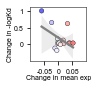

In [34]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
colors=['#e0e0ff', '#fffcfc', '#ffd2d2', '#ffacac', '#f6f6ff', '#f8f8ff','#f0f0ff', '#fffefe', '#c2c2ff', '#6666ff', '#fffafa', '#ff9a9a','#ffcece', '#ff9a9a', '#ffecec', '#ff7878']
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['Exp'], toplot['sum'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['Exp'], toplot['sum'])
plt.figure(figsize=(1,1))
ax = sns.scatterplot(x='Exp', y='sum',data=toplot,hue='Mut',s=20,palette=colors,legend=False,edgecolor='black')

# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for points in ax.collections:
    for x, y in points.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
plt.errorbar(x_coords, y_coords, yerr=toplot['Exp_sem'],xerr=toplot['total_err'], fmt=' ', zorder=-1)



sns.regplot(x='Exp', y='sum',data=toplot, scatter=False, ax=ax,color='gray')
plt.xlim(-0.1,0.1)
plt.xlabel('Change in mean exp',fontsize=7,labelpad=0.5)
plt.ylabel('Change in -logKd',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.05,0,0.05],labels=['-0.05','0','0.05'],fontsize=7)
plt.yticks(ticks=[0,0.5,1],labels=['0','0.5','1'],fontsize=7)
plt.savefig('9114_deltaexp_kd_corr.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)

## CR6261 correlation between -logKd and mean expression by position

In [35]:
#expression
CR6261_pos1 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos1_11muts_0323.csv',delimiter=','))
CR6261_pos2 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos2_11muts_0323.csv',delimiter=','))
CR6261_pos3 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos3_11muts_0323.csv',delimiter=','))
CR6261_pos4 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos4_11muts_0323.csv',delimiter=','))
CR6261_pos5 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos5_11muts_0323.csv',delimiter=','))
CR6261_pos6 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos6_11muts_0323.csv',delimiter=','))
CR6261_pos7 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos7_11muts_0323.csv',delimiter=','))
CR6261_pos8 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos8_11muts_0323.csv',delimiter=','))
CR6261_pos9 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos9_11muts_0323.csv',delimiter=','))
CR6261_pos10 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos10_11muts_0323.csv',delimiter=','))
CR6261_pos11 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/exp_pos11_11muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR6261_pos1['deltaKd'].copy()
summary['pos2']=CR6261_pos2['deltaKd'].copy()
summary['pos3']=CR6261_pos3['deltaKd'].copy()
summary['pos4']=CR6261_pos4['deltaKd'].copy()
summary['pos5']=CR6261_pos5['deltaKd'].copy()
summary['pos6']=CR6261_pos6['deltaKd'].copy()
summary['pos7']=CR6261_pos7['deltaKd'].copy()
summary['pos8']=CR6261_pos8['deltaKd'].copy()
summary['pos9']=CR6261_pos9['deltaKd'].copy()
summary['pos10']=CR6261_pos10['deltaKd'].copy()
summary['pos11']=CR6261_pos11['deltaKd'].copy()
expression = list(summary.mean())
print(expression)

[0.008910136437255937, -0.06026768721480773, -0.002527861643014814, -0.006844304902154279, 0.01938386562471682, 0.034238557510537226, -0.09954022876471916, 0.027274231605851136, 0.04712780081940376, 0.0015918082057619653, 0.006165178865648612]


In [36]:
#h1
CR6261_pos1 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos1_11muts_0323.csv',delimiter=','))
CR6261_pos2 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos2_11muts_0323.csv',delimiter=','))
CR6261_pos3 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos3_11muts_0323.csv',delimiter=','))
CR6261_pos4 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos4_11muts_0323.csv',delimiter=','))
CR6261_pos5 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos5_11muts_0323.csv',delimiter=','))
CR6261_pos6 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos6_11muts_0323.csv',delimiter=','))
CR6261_pos7 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos7_11muts_0323.csv',delimiter=','))
CR6261_pos8 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos8_11muts_0323.csv',delimiter=','))
CR6261_pos9 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos9_11muts_0323.csv',delimiter=','))
CR6261_pos10 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos10_11muts_0323.csv',delimiter=','))
CR6261_pos11 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h1_pos11_11muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR6261_pos1['deltaKd'].copy()
summary['pos2']=CR6261_pos2['deltaKd'].copy()
summary['pos3']=CR6261_pos3['deltaKd'].copy()
summary['pos4']=CR6261_pos4['deltaKd'].copy()
summary['pos5']=CR6261_pos5['deltaKd'].copy()
summary['pos6']=CR6261_pos6['deltaKd'].copy()
summary['pos7']=CR6261_pos7['deltaKd'].copy()
summary['pos8']=CR6261_pos8['deltaKd'].copy()
summary['pos9']=CR6261_pos9['deltaKd'].copy()
summary['pos10']=CR6261_pos10['deltaKd'].copy()
summary['pos11']=CR6261_pos11['deltaKd'].copy()
h1 = list(summary.mean())
print(h1)

[0.8430213220799058, 0.7247438051817972, 0.012001791611541083, 0.13496888630088405, 0.013118205824816584, 0.06631634676614978, 0.7400282865693342, -0.08744622117131985, 0.2866011160043562, 0.17663009657099227, 0.09655407178157183]


In [37]:
#h9
CR6261_pos1 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos1_11muts_0323.csv',delimiter=','))
CR6261_pos2 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos2_11muts_0323.csv',delimiter=','))
CR6261_pos3 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos3_11muts_0323.csv',delimiter=','))
CR6261_pos4 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos4_11muts_0323.csv',delimiter=','))
CR6261_pos5 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos5_11muts_0323.csv',delimiter=','))
CR6261_pos6 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos6_11muts_0323.csv',delimiter=','))
CR6261_pos7 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos7_11muts_0323.csv',delimiter=','))
CR6261_pos8 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos8_11muts_0323.csv',delimiter=','))
CR6261_pos9 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos9_11muts_0323.csv',delimiter=','))
CR6261_pos10 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos10_11muts_0323.csv',delimiter=','))
CR6261_pos11 = pd.DataFrame(pd.read_csv('../../../CR6261/Expression_meanbin/expression_analysis/change_bypos_slurm/h9_pos11_11muts_0323.csv',delimiter=','))
summary = pd.DataFrame()
summary['pos1']=CR6261_pos1['deltaKd'].copy()
summary['pos2']=CR6261_pos2['deltaKd'].copy()
summary['pos3']=CR6261_pos3['deltaKd'].copy()
summary['pos4']=CR6261_pos4['deltaKd'].copy()
summary['pos5']=CR6261_pos5['deltaKd'].copy()
summary['pos6']=CR6261_pos6['deltaKd'].copy()
summary['pos7']=CR6261_pos7['deltaKd'].copy()
summary['pos8']=CR6261_pos8['deltaKd'].copy()
summary['pos9']=CR6261_pos9['deltaKd'].copy()
summary['pos10']=CR6261_pos10['deltaKd'].copy()
summary['pos11']=CR6261_pos11['deltaKd'].copy()
h9 = list(summary.mean())
print(h9)

[0.8606512849548694, 0.9975919883789139, 0.03503280968074404, -0.08478080013741304, 0.06379324367464889, 1.044540867851839, 0.5749062759551389, -0.11816484034577333, 0.3623623715508564, 0.28176073368280274, 0.1531157679272724]


In [38]:
#merge stuff into a df for plotting
mutations = ['29','35','65','66','69','82','83','84','85','87','112.1']
data = zip(mutations,expression, h1, h9)
toplot = pd.DataFrame(data, columns=['Mut','Exp', 'H1', 'H9'])
toplot['sum']=toplot['H1']+toplot['H9']
toplot

,Mut,Exp,H1,H9,sum
0,29,0.008910,0.843021,0.860651,1.703673
1,35,-0.060268,0.724744,0.997592,1.722336
2,65,-0.002528,0.012002,0.035033,0.047035
3,66,-0.006844,0.134969,-0.084781,0.050188
4,69,0.019384,0.013118,0.063793,0.076911
5,82,0.034239,0.066316,1.044541,1.110857
6,83,-0.099540,0.740028,0.574906,1.314935
7,84,0.027274,-0.087446,-0.118165,-0.205611
8,85,0.047128,0.286601,0.362362,0.648963
9,87,0.001592,0.176630,0.281761,0.458391


-0.4600799777128418


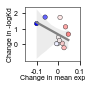

In [39]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5
colors=['#ffe8e8', '#6464ff', '#f8f8ff', '#eeeeff', '#ffcece', '#ffa8a8',
      '#0000ff', '#ffbaba', '#ff8686', '#fffafa', '#fff0f0']
flierprops = dict(marker='o', markersize=2)
corr, _ = pearsonr(toplot['Exp'], toplot['sum'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(toplot['Exp'], toplot['H1'])
plt.figure(figsize=(1,1))
#for i in range(toplot.shape[0]):
#    plt.text(x=toplot.Exp[i],y=toplot.H1[i],s=toplot.Mut[i], fontdict=dict(color='k',size=6))
ax = sns.scatterplot(x='Exp', y='sum',data=toplot,s=20,hue='Mut',palette=colors,legend=False,edgecolor='black')
sns.regplot(x='Exp', y='sum',data=toplot, scatter=False, ax=ax,color='gray')
#plt.xlim(-0.1,0.1)

plt.xlabel('Change in mean exp',fontsize=7,labelpad=0.5)
plt.ylabel('Change in -logKd',fontsize=7,labelpad=0.5)
plt.xticks(ticks=[-0.1,0,0.1],labels=['-0.1','0','0.1'],fontsize=7)
plt.yticks(ticks=[0,1,2],labels=['0','1','2'],fontsize=7)
plt.savefig('6261_deltaexp_kd_corr.png',transparent=True, dpi=600,bbox_inches='tight')
print(corr)